In [2]:
import pandas as pd

df = pd.read_csv(r"C:/Users/suhan/Downloads/ai4i+2020+predictive+maintenance+dataset/ai4i2020.csv")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Machine failure          10000 non-null  int64  
 9   TWF                      10000 non-null  int64  
 10  HDF                      10000 non-null  int64  
 11  PWF                      10000 non-null  int64  
 12  OSF                      10000 non-null  int64  
 13  RNF                      10000 non-null  int64  
dtypes: float64(3), int64(9)

In [3]:
# Convert 'Type' to categorical
df['Type'] = df['Type'].astype('category')

# Drop unnecessary columns
df.drop(['UDI', 'Product ID'], axis=1, inplace=True)

# One-hot encode 'Type'
df = pd.get_dummies(df, columns=['Type'], drop_first=True)


<Axes: title={'center': 'Machine Failure Distribution'}>

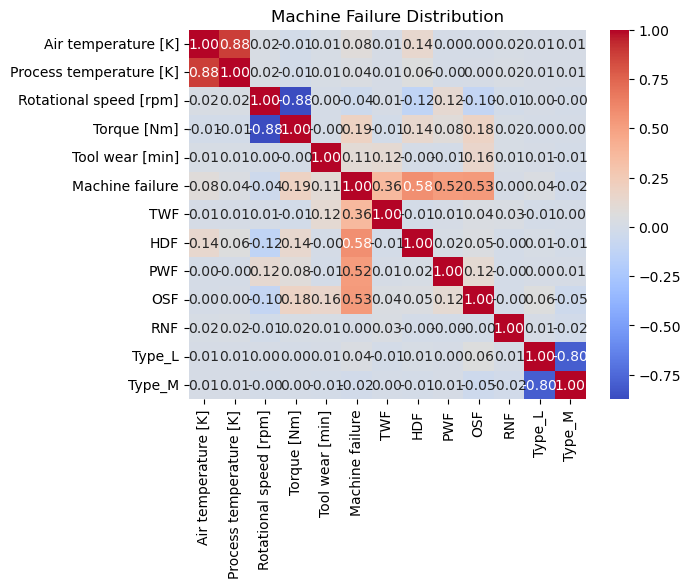

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

# Class distribution
sns.countplot(x='Machine failure', data=df)
plt.title("Machine Failure Distribution")

# Correlation matrix
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap='coolwarm')


In [5]:
from sklearn.model_selection import train_test_split

X = df.drop('Machine failure', axis=1)
y = df['Machine failure']

X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)


In [6]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print("ROC AUC:", roc_auc_score(y_test, y_pred))


[[1932    0]
 [   2   66]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1932
           1       1.00      0.97      0.99        68

    accuracy                           1.00      2000
   macro avg       1.00      0.99      0.99      2000
weighted avg       1.00      1.00      1.00      2000

ROC AUC: 0.9852941176470589


In [ ]:
import pickle

# Train the model (example)
model = RandomForestClassifier()
model.fit(X_train, y_train)

# Save the model
with open("rf_model.pkl", "wb") as f:
    pickle.dump(model, f)


Text(0.5, 1.0, 'Feature Importance')

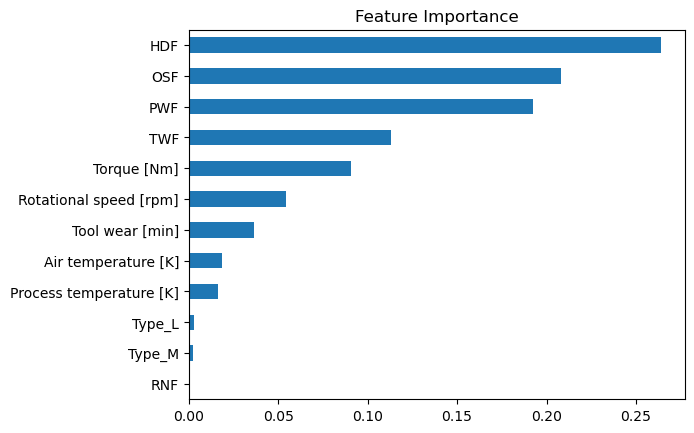

In [8]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title("Feature Importance")


In [9]:
pip install streamlit


Note: you may need to restart the kernel to use updated packages.
